### <font color='red'> Data Analytics Project:</font>
#### Mansi Mrugen Shah (ws2865)

### Data Pre-Processing

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from ipywidgets import widgets, interactive
import plotly.graph_objects as go

In [2]:
# load the data for new property listings
df_new = pd.read_excel("Raw_data.xlsx", sheet_name = "New")
df_new.head()

,price,built,type,county
0,540000,2007.0,Condominium,Alameda
1,799000,1955.0,Single Family,Alameda
2,799000,1941.0,Single Family,Alameda
3,1489000,2012.0,Single Family,Alameda
4,790000,2015.0,Townhouse,Alameda


In [3]:
# get the counts by property types
property_counts = df_new['type'].value_counts(normalize = False)
print(property_counts)

Single Family          2092
Condominium             231
Lots and Land           143
Townhouse                91
Mobile/Manufactured      75
Multi Family             63
Other                    24
Agricultural             19
Commercial                5
Cooperative               3
Farm/Ranch                3
Cabin                     2
Name: type, dtype: int64


In [4]:
# based on above results, select the top 6 property types for the analysis
types = ['Single Family', 'Condominium', 'Lots and Land', 'Townhouse' ,'Multi Family', 'Mobile/Manufactured']
df_new = df_new[df_new['type'].isin(types)]

In [5]:
# remove the outliers based on IQR method
a = df_new['price']
upper_quartile = np.percentile(a, 75)
lower_quartile = np.percentile(a, 25)
IQR = (upper_quartile - lower_quartile) * 1.5
quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
for index, row in df_new.iterrows():
    if row['price'] < quartileSet[0] or row['price'] > quartileSet[1]:
        df_new.drop(index, inplace=True)
df_new.shape

(2496, 4)

In [6]:
plt.rcParams["axes.facecolor"] = 'aliceblue'
plt.rcParams["figure.figsize"] = (23,8)

# <font color='red'> Research Question 1:</font>
#### Analyze the relationship between Property types and price across multiple counties for new property listings.

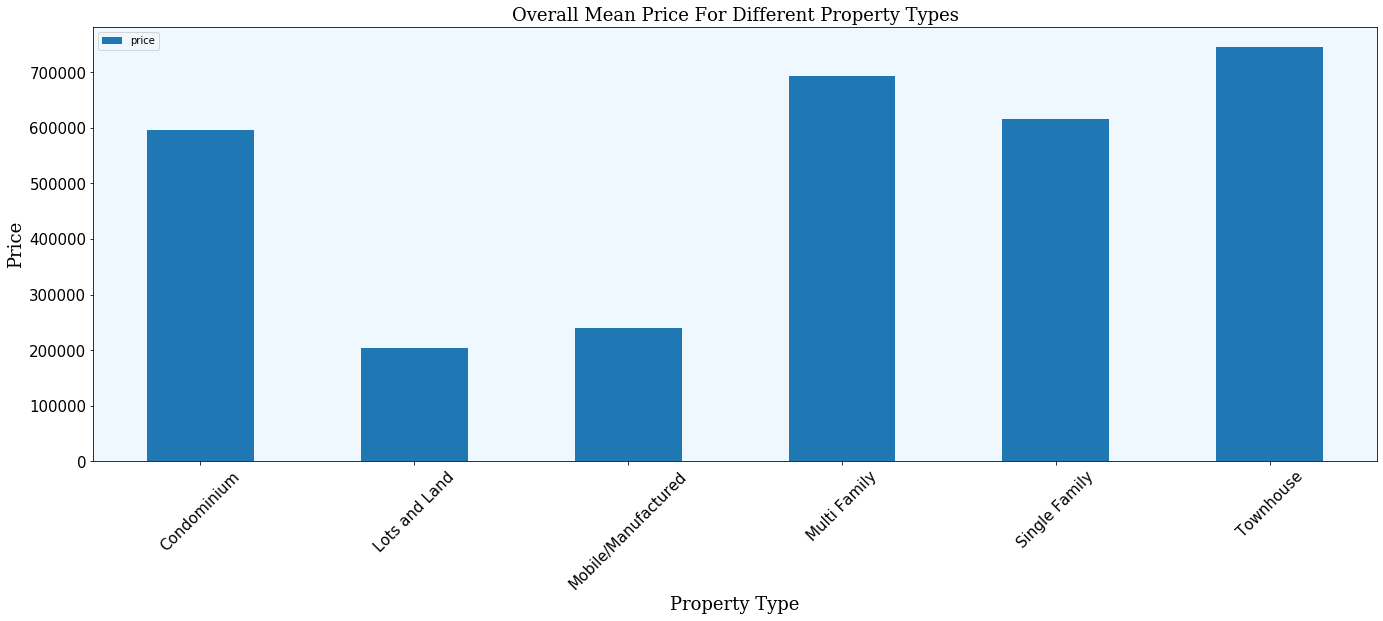

In [7]:
df_final = df_new.copy()

# lets first check the mean price of property types for all counties (overall)
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18,
        }
df_items = df_final[["type", "price"]]
df_items.groupby("type").mean().plot(kind = 'bar')
plt.xlabel("Property Type", fontdict = font)
plt.ylabel("Price", fontdict = font)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.title("Overall Mean Price For Different Property Types",fontdict=font )
plt.show()

### Based on the above graph, we can make this analysis
<ol>
    <li>It is very clear that "Lots and Land" is the cheapest of the lot. The reason for this primarily is that for this, we are only getting the land and nothing is constructed on top of it. The buyer will have to spend money to build something on it. This is purely the price of the land.</li>
    <li>"Mobile/Manufactured" are also significantly cheaper than most property types. This is primarily because for such a home, you don't own the land where the home is situated. Also, since these are factory made homes, it is not very much customizable and so, is not very lucrative for people who want to add a lot of personal touch to the place.</li>
    <li>"Townhouses" and "Multi Family" properties have a higher mean price than "Single Family" and "Condominium".</li> 
</ol>        
        
<b>But this also largely depends on the county that these properties are in. There will be further analysis below which will show this relation more clearly.</b>

### Mean Price of different proerty types per county

In [8]:

County = widgets.Dropdown(
    options=['All'] + list(df_final['county'].unique()),
    value='All',
    description='County:',
)

Type = widgets.Dropdown(
    options=['All'] + list(df_final['type'].unique()),
    value='All',
    description='Type:',
)


def plotit(County, Type):
    df_new2 = df_final.copy()
    if County == 'All' and Type == 'All':
        font = {'family': 'serif',
        'color':  'purple',
        'weight': 'normal',
        'size': 18,
        }
        df_new2.groupby(['county','type'])['price'].mean().unstack().plot(kind='bar', stacked=True, width = 0.5)
        plt.xlabel('County', fontsize = 12)
        plt.xticks(rotation = 90)
        plt.title("Mean Price of properties for different property types across all counties", fontdict = font)
        plt.xlabel("County", fontdict = font)
        plt.ylabel("Price", fontdict = font)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.show();
    else:
        if County != 'All':
            df_new2 = df_new2[df_new2.county == County]

        if Type != 'All':
            df_new2 = df_new2[df_new2.type == Type]


        # Plot it (only if there's data to plot)
        if len(df_new2) > 0:
            font = {'family': 'serif',
            'color':  'darkmagenta',
            'weight': 'normal',
            'size': 18,
            }
            df_new2.groupby(['county','type'])['price'].mean().unstack().plot(kind='bar',color = 'mediumpurple', stacked=False, width = 0.5)
            plt.xlabel('County', fontdict = font)
            plt.title("Mean Price of Properties of " + Type + " Across All Counties", fontdict = font)
            plt.ylabel("Price", fontdict = font)
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)
            plt.show();
        
interactive(plotit, County=County, Type=Type)

interactive(children=(Dropdown(description='County:', options=('All', 'Alameda', 'Amador', 'Butte', 'Calaveras…

### In the above graph, the size of the stacks inside each bar represent the mean price of a property type for that county. There are certain interesting observations we see here :-

<ul>
     <li>“Single Family Homes” are by far the most popular property on the market and are available in every county. We can see that the mean price of the homes are really high for Bay Area and Southern California (Los Angeles, Orange, San Diego).</li>
    <li>If we look at the graph for only “Lots and Land”, we see that not all counties have these property types available. It is clear that very crowded and compact places like San Francisco, San Mateo, Los Angeles and San Diego do not have a lot of open land for sale. That is mostly because a lot of the land is being used up to create homes or other properties.</li>
     <li>Almost half the counties do not have any “Mobile/Manufactured” homes listed on the market. The reason for this could be such homes either do not exist in the county or no such new homes are being constructed. Certain counties have strict laws around building new Mobile home parks which slows down the Mobile homes being built and available on the market.</li>
    <li>Looking at the price of “Mobile/Manufactured” homes across counties, we see that Santa Cruz homes are higher in cost as compared to homes in Butte county or Lake county. This is because these counties are more remote than Santa Cruz and less populated. Hence, the demand for homes there would be lower causing the prices to be lower too.</li>
</ul>

<i>Based on the distribution of property types, we are going to pick 8 counties are do deeper analysis on those. The 8 counties selected are - Alameda, San Francisco, Sacramento, Santa Cruz, Nevada, Los Angeles, Santa Clara, San Mateo.</i>

In [9]:
# now lets look at these price at the county level 
#selecting counties based on dominating property types

counties = ['Alameda','San Francisco', 'Sacramento', "Santa Cruz", "Nevada", "Los Angeles", "Santa Clara", "San Mateo"]
df_county= df_final[df_final['county'].isin(counties)]

County = widgets.Dropdown(
    options=['All'] + list(df_county['county'].unique()),
    value='All',
    description='County:',
)

Type = widgets.Dropdown(
    options=['All'] + list(df_county['type'].unique()),
    value='All',
    description='Type:',
)


def plotit(County, Type):
    df_new2 = df_county.copy()
    if County != 'All':
        df_new2 = df_new2[df_new2.county == County]

    if Type != 'All':
        df_new2 = df_new2[df_new2.type == Type]


    # Plot it (only if there's data to plot)
    if len(df_new2) > 0:
        font = {'family': 'serif',
            'color':  'darkgreen',
            'weight': 'normal',
            'size': 18,
            }
        x =sns.catplot(x="county", y="price", hue="type", kind="swarm", data=df_new2, height=4, aspect=3)
        x.set_xticklabels(rotation=90)
        plt.title("Actual Price distribution of different property types across counties", fontdict = font)
        plt.xlabel('County', fontdict = font)
        plt.ylabel("Price", fontdict = font)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.rcParams["axes.facecolor"] = 'lavender'
        plt.rcParams["figure.figsize"] = (23,8)
        plt.show();
    

In [10]:
interactive(plotit, County=County, Type=Type)

interactive(children=(Dropdown(description='County:', options=('All', 'Alameda', 'Sacramento', 'Santa Cruz', '…

# <font color='red'> Research Question 2:</font>
### Analyze the relationship between year built and price across different property types and counties?

In [11]:
df_final_built = df_new.copy()


# remove rows with null values in built column
df_final_built = df_final_built[df_final_built.built.notnull()]
# convert built to integer type
df_final_built['built'] = df_final_built['built'].astype(int)
df_final_built.shape

(2321, 4)

In [12]:
# now, transforming the 'built' column to range of 10 years

def year(yr):
    built = int(yr)
    converted_yr = built - (built%10)
    return (str(converted_yr)+ "-" + str(converted_yr + 10))

year_built = []
for i in df_final_built['built']:
    year_built.append(year(i))
df_final_built['year_built'] = year_built

In [13]:
plt.rcParams["axes.facecolor"] = 'lightgrey'

### Mean Price of property types across decades

In [14]:

Year = widgets.Dropdown(
    options=['All'] + list(df_final_built['year_built'].unique()),
    value='All',
    description='Built Year:',
)

Type = widgets.Dropdown(
    options=list(df_final_built['type'].unique()),
    value='Condominium',
    description='Type:',
)


def plotit(Year, Type):
    df_final_v2 = df_final_built.copy()
    if Year != 'All':
        df_final_v2 = df_final_v2[df_final_v2.year_built == Year]
    df_final_v2 = df_final_v2[df_final_v2.type == Type]


    # Plot it (only if there's data to plot)
    if len(df_final_v2) > 0:
        font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 18,
        }
        color = np.random.rand()
        df_final_v2.groupby(['year_built','type'])['price'].mean().unstack().plot(kind='bar',color = 'mediumseagreen', stacked=False, width = 0.5)
        plt.xlabel('Year', fontdict = font)
        plt.title("Mean Price of " + Type + " Across All Years", fontdict = font)
        plt.ylabel("Price", fontdict = font)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show();

interactive(plotit, Year=Year, Type=Type)

interactive(children=(Dropdown(description='Built Year:', options=('All', '2000-2010', '1950-1960', '1940-1950…

### Comparison of Mean price and count of properties across decades

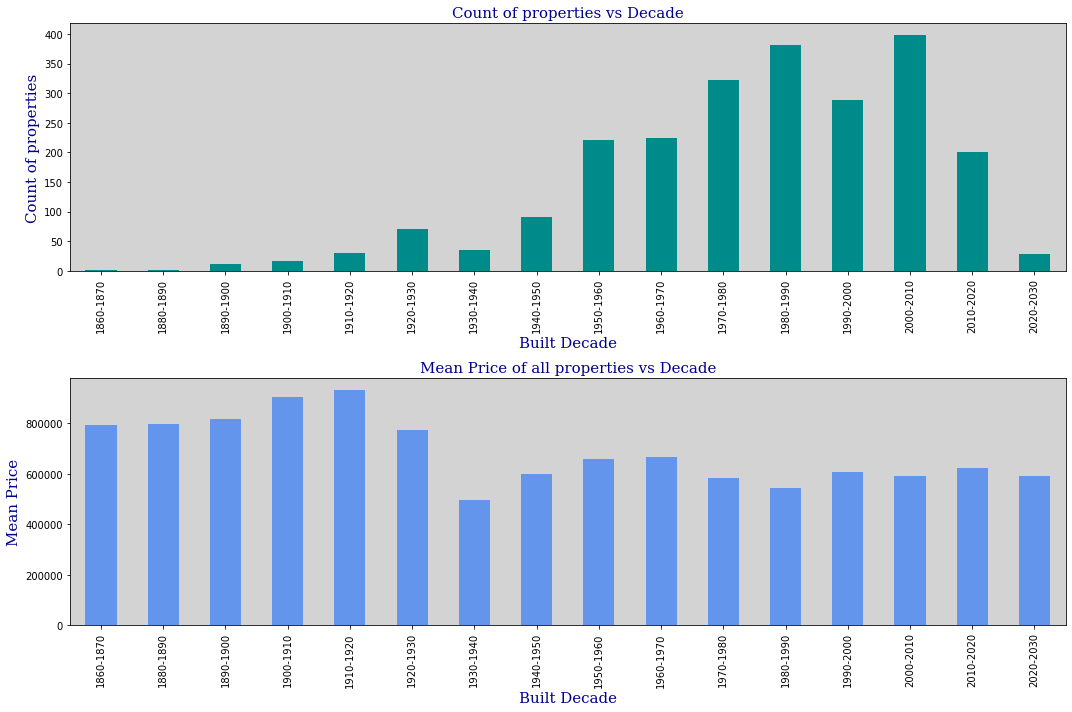

In [15]:
font = {'family': 'serif',
            'color':  'darkblue',
            'weight': 'normal',
            'size': 15,
            }
df_items = pd.DataFrame(df_final_built, columns = ['year_built', 'price'])
fig, axs = plt.subplots(2,1,figsize=(15, 10))#Adjusting
df_items.groupby('year_built').count().plot(kind='bar', ax = axs[0], color = 'darkcyan')
axs[0].set_ylabel('Count of properties', fontdict = font)
axs[0].set_xlabel('Built Decade', fontdict = font)
axs[0].get_legend().remove()
axs[0].set_title('Count of properties vs Decade', fontdict = font)
df_items.groupby('year_built').mean().plot(kind='bar', ax = axs[1], color = 'cornflowerblue')
axs[1].set_ylabel('Mean Price', fontdict = font)
axs[1].set_xlabel('Built Decade', fontdict = font)
axs[1].set_title('Mean Price of all properties vs Decade', fontdict = font)
axs[1].get_legend().remove()
plt.rcParams["axes.facecolor"] = 'lavender'
plt.tight_layout()


In [16]:
plt.rcParams["axes.facecolor"] = 'aliceblue'

In [17]:
## splitting the built in two parts: before 1990 and after 1990

df_year = df_final_built.copy()
def year(yr):
    built = int(yr)
    if(built < 1990):
        return '1860-1990'
    converted_yr = built - (built%10)
    return (str(converted_yr)+ "-" + str(converted_yr + 10))

year_built = []
for i in df_year['built']:
    year_built.append(year(i))
df_year['year_built'] = year_built

In [18]:
df_old = df_year[df_year['year_built'] == '1860-1990']
df_new = df_year[df_year['year_built'] != '1860-1990']

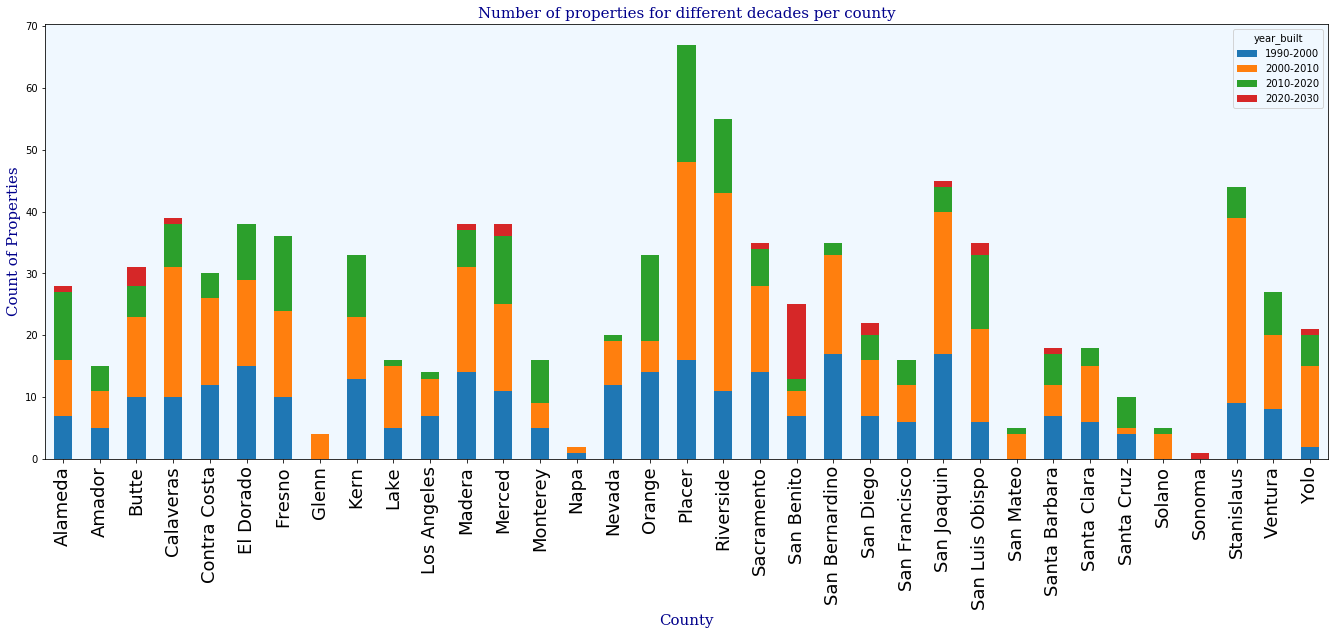

In [19]:
abc = df_new.groupby(['county','year_built'])['price'].count().unstack()
abc.plot(kind='bar', stacked=True)
plt.xlabel('County', fontdict = font)
plt.ylabel('Count of Properties', fontdict = font)
plt.xticks(fontsize = 18)
plt.title("Number of properties for different decades per county", fontdict = font)
plt.show()

In [20]:
df_old = df_old.sort_values(by = 'county')

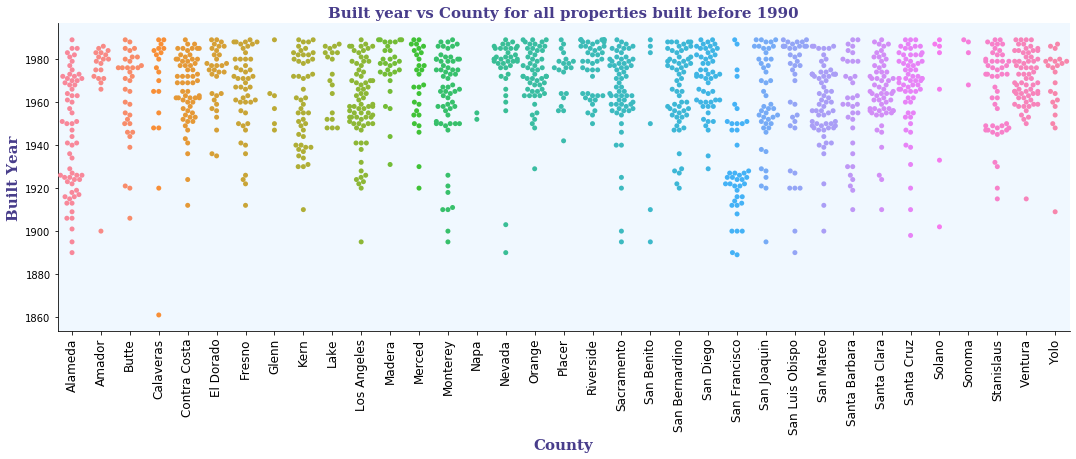

In [21]:
font = {'family': 'serif',
        'color':  'darkslateblue',
        'weight': 'bold',
        'size': 15,
        }

x =sns.catplot(x="county", y="built", kind="swarm", data=df_old, height=5, aspect=3);
x.set_xticklabels(rotation=90, fontsize = 12)
x.set_xlabels("County", fontdict = font )
x.set_ylabels("Built Year", fontdict = font )
plt.title("Built year vs County for all properties built before 1990",fontdict = font)

plt.show()

# <font color='red'>Research Question 3:</font>
### Analyze the relationship between sold price and property types across counties. Which county sold the most/least homes categorized by property type?

In [22]:
df_sold = pd.read_excel("Raw_data.xlsx", sheet_name = "Sold")

In [23]:
types = ['Single Family', 'Condominium', 'Lots and Land', 'Townhouse' ,'Multi Family', 'Mobile/Manufactured']
df_sold = df_sold[df_sold['type'].isin(types)]
df_sold = df_sold[df_sold.sold_price.notnull()]
df_sold = df_sold[df_sold.county.notnull()]
df_final_sold = df_sold.copy()
df_final_sold.shape

(2777, 3)

In [24]:
a = df_final_sold['sold_price']
upper_quartile = np.percentile(a, 75)
lower_quartile = np.percentile(a, 25)
IQR = (upper_quartile - lower_quartile) * 1.5
quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
for index, row in df_final_sold.iterrows():
    if row['sold_price'] < quartileSet[0] or row['sold_price'] > quartileSet[1]:
        df_final_sold.drop(index, inplace=True)

df_final_sold.shape

(2596, 3)

In [25]:
df_N_counts_by_type = df_final_sold.groupby(['type'])['sold_price'].count().reset_index(name = 'count')
df_N_counts_by_type

,type,count
0,Condominium,263
1,Lots and Land,47
2,Mobile/Manufactured,73
3,Multi Family,37
4,Single Family,2069
5,Townhouse,107


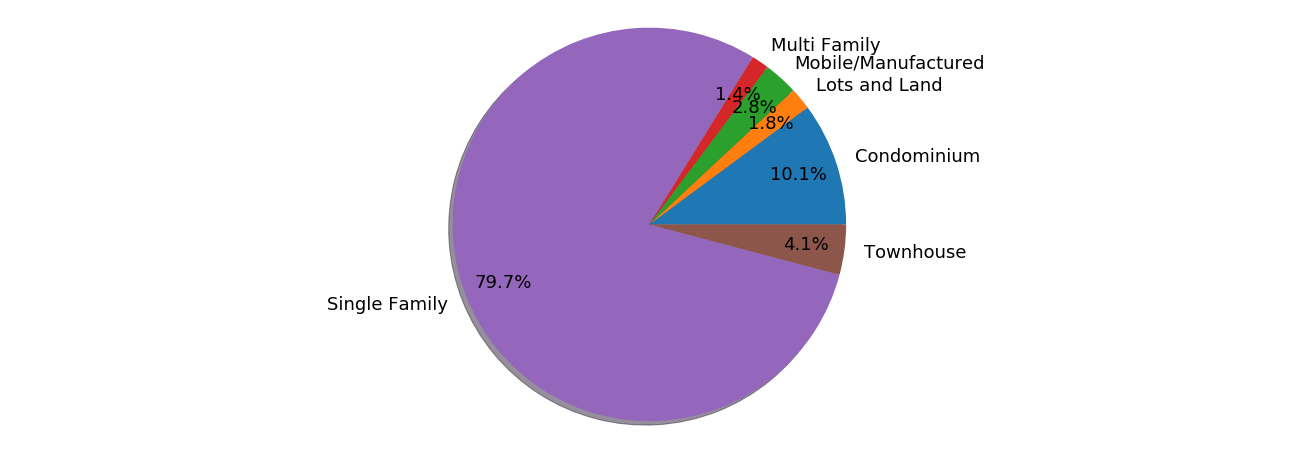

In [26]:
# The slices will be ordered and plotted counter-clockwise.

labels = df_N_counts_by_type['type']
sizes = df_N_counts_by_type['count']
explode = (0, 0, 0, 0, 0, 0)
fig, axs = plt.subplots()
axs.pie(sizes, explode=explode, labels=labels,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False, textprops={'fontsize': 18})
axs.axis('equal')
plt.show()

In [32]:
df_final_sold = df_final_sold.sort_values(by = 'county')

In [33]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df_final_sold, x="county", y="sold_price", color="type")
fig.update_layout(
    title={'text':"Sold price across property Types per County"},
    xaxis_title = "County",
    yaxis_title  ="Sold Price"
    )
fig.show()

In [29]:
df_max = df_final_sold.groupby(['county','type'])['sold_price'].count().reset_index(name = 'properties_sold')
df_max.head()

,county,type,properties_sold
0,Alameda,Condominium,17
1,Alameda,Multi Family,1
2,Alameda,Single Family,64
3,Alameda,Townhouse,12
4,Amador,Lots and Land,11


In [30]:
df_condominium = df_max[df_max.type == 'Condominium']
max_condominium = df_condominium[df_condominium.properties_sold == df_condominium.properties_sold.max()]
min_condominium = df_condominium[df_condominium.properties_sold == df_condominium.properties_sold.min()]

df_singlefamily = df_max[df_max.type == 'Single Family']
max_singlefamily = df_singlefamily[df_singlefamily.properties_sold == df_singlefamily.properties_sold.max()]
min_singlefamily = df_singlefamily[df_singlefamily.properties_sold == df_singlefamily.properties_sold.min()]

df_multifamily = df_max[df_max.type == 'Multi Family']
max_multifamily = df_multifamily[df_multifamily.properties_sold == df_multifamily.properties_sold.max()]
min_multifamily = df_multifamily[df_multifamily.properties_sold == df_multifamily.properties_sold.min()]

df_lotsandland = df_max[df_max.type == 'Lots and Land']
max_lotsandland = df_lotsandland[df_lotsandland.properties_sold == df_lotsandland.properties_sold.max()]
min_lotsandland = df_lotsandland[df_lotsandland.properties_sold == df_lotsandland.properties_sold.min()]

df_townhouse = df_max[df_max.type == 'Townhouse']
max_townhouse = df_townhouse[df_townhouse.properties_sold == df_townhouse.properties_sold.max()]
min_townhouse = df_townhouse[df_townhouse.properties_sold == df_townhouse.properties_sold.min()]

df_mobilemanufactured = df_max[df_max.type == 'Mobile/Manufactured']
max_mobilemanufactured = df_mobilemanufactured[df_mobilemanufactured.properties_sold == df_mobilemanufactured.properties_sold.max()]
min_mobilemanufactured = df_mobilemanufactured[df_mobilemanufactured.properties_sold == df_mobilemanufactured.properties_sold.min()]


df_max_min = pd.DataFrame([], columns=['Type', 'Max_County', 'Max_Sold', 'Min_County', 'Min_Sold'])
df_max_min.loc[0] = ['Condominium', max_condominium.county.values[0], max_condominium.properties_sold.values[0], min_condominium.county.values[0], min_condominium.properties_sold.values[0]]
df_max_min.loc[1] = ['Single Family', max_singlefamily.county.values[0], max_singlefamily.properties_sold.values[0], min_singlefamily.county.values[0], min_singlefamily.properties_sold.values[0]]
df_max_min.loc[2] = ['Multi Family', max_multifamily.county.values[0], max_multifamily.properties_sold.values[0], min_multifamily.county.values[0], min_multifamily.properties_sold.values[0]]
df_max_min.loc[3] = ['Lots and Land', max_lotsandland.county.values[0], max_lotsandland.properties_sold.values[0], min_lotsandland.county.values[0], min_lotsandland.properties_sold.values[0]]
df_max_min.loc[4] = ['Townhouse', max_townhouse.county.values[0], max_townhouse.properties_sold.values[0], min_townhouse.county.values[0], min_townhouse.properties_sold.values[0]]
df_max_min.loc[5] = ['Mobile/Manufactured', max_mobilemanufactured.county.values[0], max_mobilemanufactured.properties_sold.values[0], min_mobilemanufactured.county.values[0], min_mobilemanufactured.properties_sold.values[0]]


In [31]:

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_max_min.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_max_min['Type'], df_max_min['Max_County'], df_max_min['Max_Sold'],
                       df_max_min['Min_County'],df_max_min['Min_Sold']],     
               fill_color='lavender',
               align='left'))
])

fig.show()